In [1]:
#本章需导入的模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
import matplotlib.cm as cm
import warnings
warnings.filterwarnings(action = 'ignore')
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False
from sklearn import svm
import sklearn.linear_model as LM
import scipy.stats as st
from scipy.optimize import root,fsolve
from sklearn.feature_selection import  VarianceThreshold,SelectKBest,f_classif,chi2
from sklearn.feature_selection import RFE,RFECV,SelectFromModel
from sklearn.linear_model import Lasso,LassoCV,lasso_path,Ridge,RidgeCV
from sklearn.linear_model import enet_path,ElasticNetCV,ElasticNet

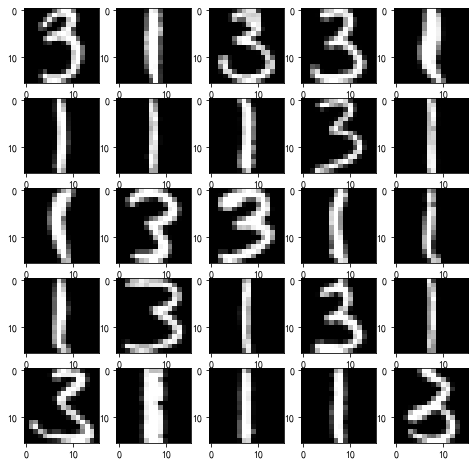

In [4]:
data=pd.read_table('邮政编码数据.txt',sep=' ',header=None)
tmp=data.loc[(data[0]==1) | (data[0]==3)]
X=tmp.iloc[:,1:-1]
Y=tmp.iloc[:,0]
np.random.seed(1)
ids=np.random.choice(len(Y),25)
plt.figure(figsize=(8,8))
for i,item in enumerate(ids):
    img=np.array(X.iloc[item,]).reshape((16,16))
    plt.subplot(5,5,i+1)
    plt.imshow(img,cmap=cm.gray)
plt.show()


变量重要性评分： [  5.10898495  21.93357405  82.3841514  282.84509937 719.07806468]
变量的概率P-值: [2.39312394e-002 3.05218712e-006 3.08578340e-019 9.82205018e-059
 6.44143983e-132]


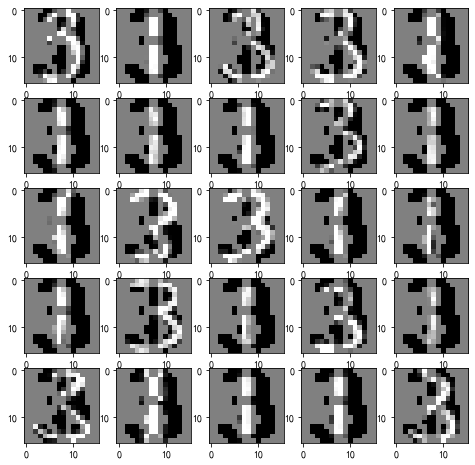

In [5]:
selector=SelectKBest(score_func=f_classif,k=100)  
selector.fit(X,Y)
print("变量重要性评分：",selector.scores_[0:5])
print("变量的概率P-值:",selector.pvalues_[0:5])
X=selector.inverse_transform(selector.transform(X))
plt.figure(figsize=(8,8))
for i,item in enumerate(ids):
    img=np.array(X[item,]).reshape((16,16))
    plt.subplot(5,5,i+1)
    plt.imshow(img,cmap=cm.gray)
plt.show()

代码说明：
（1）第1，2行：定义高相关过滤法对象并拟合数据。
（2）第3，4行：输出前5个变量的特征选择结果。
（3）第5行：基于高相关过滤结果，将概率P-值较大排在前156之前的变量的变量值均替换为0，为后续直观展示高相关过滤效果做数据准备。
（4）第7至10行：利用for循环再次逐个展示25个高相关过滤处理后的手写体数字1和3。